# Lab-11 KNN with packages and KNN, Weighted KNN without packages

## Tanishq Gupta - 19BCE1392

KNN with packages

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
irisData = load_iris()
X = irisData.data
y = irisData.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

In [4]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [5]:
print(knn.predict(X_test))

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


KNN and Weighted KNN without packages

In [6]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
x = []
y = []
c = []
for i in range(30):
    x.append(random.randint(0,15))
    y.append(random.randint(0,15))
    c.append(random.randint(0,1))
data = list(zip(x,y,c))
df  = pd.DataFrame(data, columns = ['x','y','class'])
colors = {0:'orange', 1:'green'}
df

,x,y,class
0,11,11,1
1,13,7,1
2,1,3,1
3,10,14,0
4,0,14,1
5,3,8,1
6,4,12,1
7,0,4,0
8,13,7,1
9,7,10,0


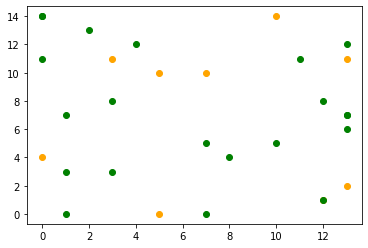

In [8]:
fig, ax = plt.subplots()
for i in range(30):
    ax.scatter(df['x'][i], df['y'][i],color=colors[df['class'][i]])

In [9]:
def visualise(df,pred,x0,y0,K):
    for j in range(1,6):
        ax = plt.subplot(2,3,j)
        plt.title("Knn for k = "+str(K[j-1]))

        for i in range(30):
            ax.scatter(df['x'][i], df['y'][i],color=colors[df['class'][i]])
            
        if(pred[j-1]==0):
            ax.plot(x0,y0,'x',color='orange')
        
        else:
            ax.plot(x0,y0,'x',color='green')        
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()

In [10]:
def distance(x0,y0,df):
    dist=[]
    #finding the distance of each point in the dataset wrt (6,12)
    for i in range(0,30):
        d = round(math.sqrt((df.iloc[i,0]-x0)**2+(df.iloc[i,1]-y0)**2),2)
        dist.append((d,df.iloc[i,2])) #storing distance and class as tuple in list dist. 
    return dist

In [11]:
def KNN_Classifier(df,k,x0,y0):
    dist=distance(x0,y0,df)
    dist.sort()
    KNN=dist[:k]
    count=[0,0]
    for i in range(k):
        count[KNN[i][1]]+=1
   # print(count)
    if count[0]>count[1]:
        return 0
    else:
        return 1

The pridect class for the point (6,12) for different k values

K	class
7 	 0
11 	 1
17 	 1
23 	 1
27 	 1


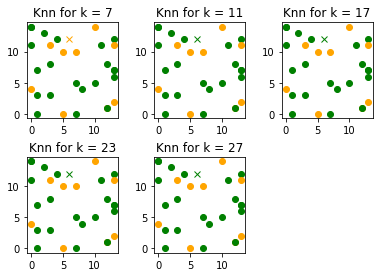

In [12]:
x0 = 6
y0 = 12
K=[7,11,17,23,27]
predClass = []
for k in K:
    result = KNN_Classifier(df,k,x0,y0)
    predClass.append(result)

print("The pridect class for the point (6,12) for different k values\n\nK\tclass")
for i in range(5):
    print(K[i],"\t",predClass[i])

visualise(df,predClass,x0,y0,K)

In [13]:
def Weighted_KNN_Classifier(df,k,x0,y0):
    dist=distance(x0,y0,df)
    dist.sort()
    KNN=dist[:k]
    w = []
    for i in range(k):
        if(KNN[i][0]!=0):
            w.append(round(1/KNN[i][0],2))
        else:
            w.append(KNN[i][0])
    #for i in range(k):
        #print(KNN[i],"\t",w)
    sum=[0,0]
    for i in range(k):
        sum[KNN[i][1]]+=w[i]
    #print(sum)
    if sum[0]>sum[1]:
        return 0
    else:
        return 1

The pridect class for the point (6,12) for different k values

K	class
9 	 0
13 	 1
19 	 1
25 	 1
29 	 1


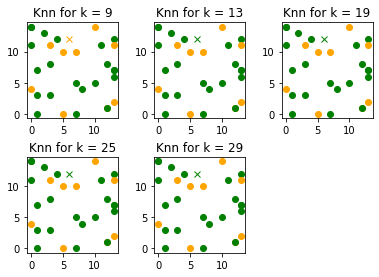

In [14]:
x0 = 6
y0 = 12
K=[9,13,19,25,29]
predClass = []
for k in K:
    result = Weighted_KNN_Classifier(df,k,x0,y0)
    predClass.append(result)
print("The pridect class for the point (6,12) for different k values\n\nK\tclass")
for i in range(5):
    print(K[i],"\t",predClass[i])
visualise(df,predClass,x0,y0,K)